In [8]:
import mne
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import savemat, loadmat

In [6]:
raw = mne.io.read_raw_edf("chb01_03.edf")

Extracting EDF parameters from c:\Users\202211049\Desktop\python_test\chb01_03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


C:\Users\202211049\AppData\Local\Temp\ipykernel_3932\2494023694.py:1: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf("chb01_03.edf")


In [29]:
sfreq = int(raw.info['sfreq'])

In [13]:
channels = raw.to_data_frame(picks='eeg', index='time')

In [37]:
window = 60 * sfreq
slide = 1 * sfreq

In [34]:
DFC = np.empty((3541, 23, 23))

In [39]:
for t, i in enumerate(range(0, len(channels) - window + slide, slide)):
    DFC[t] = channels.iloc[i: i + window].corr()

In [41]:
DFC[0].shape

(23, 23)

In [45]:
# savemat("pearson.mat", {'data':DFC})

In [3]:
DFC = loadmat("pearson.mat")['data']

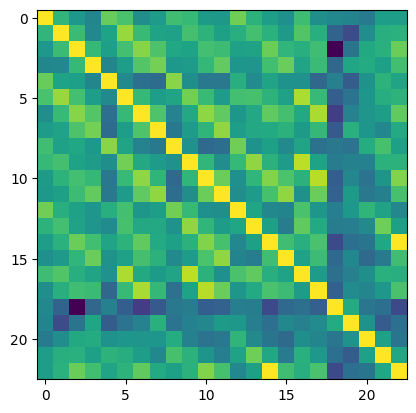

In [10]:
plt.imshow(DFC[2])

In [29]:
DFC4 = (DFC >= 0.4) * DFC
DFC5 = (DFC >= 0.5) * DFC
DFC6 = (DFC >= 0.6) * DFC
DFC7 = (DFC >= 0.7) * DFC
DFC8 = (DFC >= 0.8) * DFC

In [34]:
for i, dfc in enumerate([DFC4, DFC5, DFC6, DFC7, DFC8], 4):
    savemat(f"pearson{i}.mat", {'data':dfc})

In [ ]:
DFC4[0]

In [ ]:
DFC8[1]